In [1]:
# import the API
from otter import Otter, Transient

In [2]:
# connect to the database

db = Otter(username='user@otter', password='insecure')

# A typical workflow

### First use `Otter.getMeta` to query

In [3]:
# can query by ANY name associated with an object
db.getMeta(names=['ASASSN-15oi', 'AT2020opy'])

[{'name': {'default_name': 'ASASSN-15oi', 'alias': [{'value': 'ASASSN-15oi', 'reference': 'ASASSN'}]}, 'coordinate': {'equitorial': [{'ra': '20 39 09.096', 'dec': '-30 45 20.71', 'epoch': 'J2000', 'system': 'ICRS', 'ra_units': 'hourangle', 'dec_units': 'deg', 'reference': ['2021NatAs...5..491H'], 'computed': False, 'default': True, 'uuid': '8829807c-e485-4f73-bbc4-3e72f190515a'}], 'galactic': [{'l': 13.011544857518546, 'b': -35.41877256185316, 'l_units': 'deg', 'b_units': 'deg', 'reference': '8829807c-e485-4f73-bbc4-3e72f190515a', 'computed': True}]}, 'epoch': {'date_discovery': [{'value': 57248.2, 'date_format': 'MJD', 'reference': ['2021NatAs...5..491H'], 'computed': False}]}, 'distance': {'redshift': [{'value': '0.0484', 'reference': ['2021NatAs...5..491H'], 'computed': False}]}, 'classification': [{'object_class': 'TDE', 'confidence': 1, 'reference': ['2021NatAs...5..491H'], 'default': True}]},
 {'name': {'default_name': 'AT2020opy', 'alias': [{'value': 'AT2020opy', 'reference': 'T

In [4]:
# can do a cone search
from astropy.coordinates import SkyCoord
import astropy.units as u
coord = SkyCoord(239, 23, unit=('deg', 'deg'))
rad = (1*u.deg).to(u.arcsec).value
db.getMeta(coords=coord, radius=rad)

[{'name': {'default_name': 'AT2020opy', 'alias': [{'value': 'AT2020opy', 'reference': 'TNS'}]}, 'coordinate': {'equitorial': [{'ra': '15 56 25.728', 'dec': '+23 22 21.15', 'epoch': 'J2000', 'system': 'ICRS', 'ra_units': 'hourangle', 'dec_units': 'deg', 'reference': ['2023MNRAS.518..847G'], 'computed': False, 'default': True, 'uuid': '512c0fb3-c03d-4054-b121-2d2244accb60'}], 'galactic': [{'l': 38.41156935899329, 'b': 48.23253616380998, 'l_units': 'deg', 'b_units': 'deg', 'reference': '512c0fb3-c03d-4054-b121-2d2244accb60', 'computed': True}]}, 'epoch': {'date_discovery': [{'value': 59038.23, 'date_format': 'MJD', 'reference': ['2023MNRAS.518..847G'], 'computed': False}]}, 'distance': {'redshift': [{'value': '0.159', 'reference': ['2023MNRAS.518..847G'], 'computed': False}]}, 'classification': [{'object_class': 'TDE', 'confidence': 1, 'reference': ['2023MNRAS.518..847G'], 'default': True}]}]

In [5]:
# can search a redshift range
db.getMeta(minZ=0.5, maxZ=0.9)

[{'name': {'default_name': 'Sw J1112-82', 'alias': [{'value': 'Sw J1112-82', 'reference': 'Swift'}]}, 'coordinate': {'equitorial': [{'ra': '11 11 47.6', 'dec': '-82 38 44.44', 'epoch': 'J2000', 'system': 'ICRS', 'ra_units': 'hourangle', 'dec_units': 'deg', 'reference': ['2017MNRAS.472.4469B'], 'computed': False, 'default': True, 'uuid': '0d88f76a-8159-41ed-98cc-9d8fa5fe0943'}], 'galactic': [{'l': 299.6337165869646, 'b': -20.420594756871676, 'l_units': 'deg', 'b_units': 'deg', 'reference': '0d88f76a-8159-41ed-98cc-9d8fa5fe0943', 'computed': True}]}, 'epoch': {'date_discovery': [{'value': '55729.5', 'date_format': 'MJD', 'reference': ['2017MNRAS.472.4469B'], 'computed': False}]}, 'distance': {'redshift': [{'value': '0.89', 'reference': ['2017MNRAS.472.4469B'], 'computed': False}]}, 'classification': [{'object_class': 'TDE', 'confidence': 1, 'reference': ['2017MNRAS.472.4469B'], 'default': True}]}]

In [6]:
# just get objects that have spectra associated with them
db.getMeta(hasSpec=True)

[]

### These outputs may appear like dictionaries but they're actually customized!

In [7]:
t = db.getMeta(minZ=0.5, maxZ=0.9)[0]
print(type(t))
print()
# say you want to get the equitorial coordinates
# you can do it classically 
print(t['coordinate']['equitorial'])

# or you can use the hdf5 style
print(t['coordinate/equitorial'])

<class 'otter.transient.Transient'>

[{'ra': '11 11 47.6', 'dec': '-82 38 44.44', 'epoch': 'J2000', 'system': 'ICRS', 'ra_units': 'hourangle', 'dec_units': 'deg', 'reference': ['2017MNRAS.472.4469B'], 'computed': False, 'default': True, 'uuid': '0d88f76a-8159-41ed-98cc-9d8fa5fe0943'}]
[{'ra': '11 11 47.6', 'dec': '-82 38 44.44', 'epoch': 'J2000', 'system': 'ICRS', 'ra_units': 'hourangle', 'dec_units': 'deg', 'reference': ['2017MNRAS.472.4469B'], 'computed': False, 'default': True, 'uuid': '0d88f76a-8159-41ed-98cc-9d8fa5fe0943'}]


In [8]:
# You can also get multiple fields at once
t[['name/default_name', 'coordinate/equitorial', 'distance']]

{'name/default_name': 'Sw J1112-82', 'coordinate/equitorial': [{'ra': '11 11 47.6', 'dec': '-82 38 44.44', 'epoch': 'J2000', 'system': 'ICRS', 'ra_units': 'hourangle', 'dec_units': 'deg', 'reference': ['2017MNRAS.472.4469B'], 'computed': False, 'default': True, 'uuid': '0d88f76a-8159-41ed-98cc-9d8fa5fe0943'}], 'distance': {'redshift': [{'value': '0.89', 'reference': ['2017MNRAS.472.4469B'], 'computed': False}]}}

In [9]:
# you can also add two Transient objects to merge them

t1, t2 = db.getMeta(names=['ASASSN-15oi', 'AT2020opy'])

try:
    t1 + t2
except ValueError as ve:
    print('The following error is actually expected!')
    print('We dont want you to be able to combine any old transients!')
    print()
    print('Error Message:')
    print(ve)

The following error is actually expected!
We dont want you to be able to combine any old transients!

Error Message:
These two transients are not within 5 arcseconds! They probably do not belong together! If they do You can set strict_merge=False to override the check


In [10]:
# If you want to override this you have to do
t1.__add__(t2, strict_merge=False)

{'name': {'default_name': 'AT2020opy', 'alias': [{'value': 'ASASSN-15oi', 'reference': ['ASASSN']}, {'value': 'AT2020opy', 'reference': ['TNS']}]}, 'coordinate': {'equitorial': [{'ra': '20 39 09.096', 'dec': '-30 45 20.71', 'epoch': 'J2000', 'system': 'ICRS', 'ra_units': 'hourangle', 'dec_units': 'deg', 'reference': ['2021NatAs...5..491H'], 'computed': False, 'default': True, 'uuid': '8829807c-e485-4f73-bbc4-3e72f190515a'}, {'ra': '15 56 25.728', 'dec': '+23 22 21.15', 'epoch': 'J2000', 'system': 'ICRS', 'ra_units': 'hourangle', 'dec_units': 'deg', 'reference': ['2023MNRAS.518..847G'], 'computed': False, 'default': True, 'uuid': '512c0fb3-c03d-4054-b121-2d2244accb60'}], 'galactic': [{'l': 13.011544857518546, 'b': -35.41877256185316, 'l_units': 'deg', 'b_units': 'deg', 'reference': '8829807c-e485-4f73-bbc4-3e72f190515a', 'computed': True}, {'l': 38.41156935899329, 'b': 48.23253616380998, 'l_units': 'deg', 'b_units': 'deg', 'reference': '512c0fb3-c03d-4054-b121-2d2244accb60', 'computed':

Obviously, this result doesn't makes sense! This has the data from two completely different transients in it. So, be careful using `strict_merge=False`!

## Can then get photometry 
This does the conversion for you!!!

In [11]:
db.getPhot?

Signature:
db.getPhot(
    flux_unit='mag(AB)',
    date_unit='MJD',
    return_type='astropy',
    **kwargs,
) -> astropy.table.table.Table
Docstring:
Get the photometry of the objects matching the arguments. This will do the
unit conversion for you!

Args:
    flux_units [astropy.unit.Unit]: Either a valid string to convert 
                                    or an astropy.unit.Unit
    date_units [astropy.unit.Unit]: Either a valid string to convert to a date 
                                    or an astropy.unit.Unit
    return_type [str]: Either 'astropy' or 'pandas'. If astropy, returns an
                       astropy Table. If pandas, returns a pandas DataFrame.
                       Default is 'astropy'.
    
    **kwargs : Arguments to pass to Otter.query(). Can be:
               names [list[str]]: A list of names to get the metadata for
               coords [SkyCoord]: An astropy SkyCoord object with coordinates to match to
               radius [float]: The radius in 

In [12]:
# can easily grab photometry in consistent units to plot!
import matplotlib.pyplot as plt
flux_unit = 'erg/s/cm^2/Hz'
tab = db.getPhot(flux_unit=flux_unit, date_unit='datetime', names=['ASASSN-15oi', 'ASASSN-14li'], return_type='pandas')

tab

,filter_key,computed,obs_type,upperlimit,date,reference,phot_num,freq_eff,freq_units,human_readable_refs,converted_flux,converted_date,name
0,5.0GHz,False,radio,False,57124.871000,"[2016ApJ...819L..25A, 2016Sci...351...62V, 201...",phot_0,5.0,GHz,Alexander et al. (2016)<br>van Velzen et al. (...,1.910000e-26,2015-04-12 20:54:14.400000,ASASSN-14li
1,5.0GHz,False,radio,False,57190.830000,"[2016ApJ...819L..25A, 2016Sci...351...62V, 201...",phot_0,5.0,GHz,Alexander et al. (2016)<br>van Velzen et al. (...,1.741700e-26,2015-06-17 19:55:12.000000,ASASSN-14li
2,5.0GHz,False,radio,False,57229.750000,"[2016ApJ...819L..25A, 2016Sci...351...62V, 201...",phot_0,5.0,GHz,Alexander et al. (2016)<br>van Velzen et al. (...,1.562000e-26,2015-07-26 18:00:00.000000,ASASSN-14li
3,5.0GHz,False,radio,False,57286.514583,"[2016ApJ...819L..25A, 2016Sci...351...62V, 201...",phot_0,5.0,GHz,Alexander et al. (2016)<br>van Velzen et al. (...,1.256500e-26,2015-09-21 12:20:59.997120,ASASSN-14li
4,5.0GHz,False,radio,False,57362.700000,"[2016ApJ...819L..25A, 2016Sci...351...62V, 201...",phot_0,5.0,GHz,Alexander et al. (2016)<br>van Velzen et al. (...,8.731500e-27,2015-12-06 16:48:00.000000,ASASSN-14li
0,6.1GHz,False,radio,True,57256.200000,2021NatAs...5..491H,phot_0,6.1,GHz,Horesh et al. (2021),3.300000e-28,2015-08-22 04:48:00.000000,ASASSN-15oi
1,6.1GHz,False,radio,True,57271.200000,2021NatAs...5..491H,phot_0,6.1,GHz,Horesh et al. (2021),3.600000e-28,2015-09-06 04:48:00.000000,ASASSN-15oi
2,6.1GHz,False,radio,True,57338.200000,2021NatAs...5..491H,phot_0,6.1,GHz,Horesh et al. (2021),6.000000e-28,2015-11-12 04:48:00.000000,ASASSN-15oi
3,4.8GHz,False,radio,False,57430.200000,2021NatAs...5..491H,phot_0,4.8,GHz,Horesh et al. (2021),1.114000e-26,2016-02-12 04:48:00.000000,ASASSN-15oi
4,4.8GHz,False,radio,False,57438.200000,2021NatAs...5..491H,phot_0,4.8,GHz,Horesh et al. (2021),8.990000e-27,2016-02-20 04:48:00.000000,ASASSN-15oi


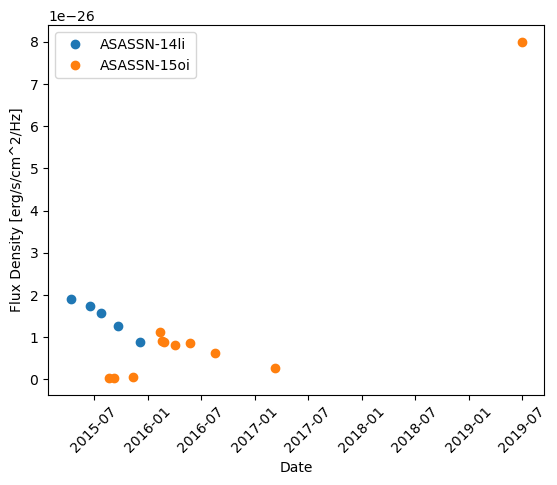

In [13]:
fig, ax = plt.subplots()
for key, table in tab.groupby('name'):
    ax.plot(table['converted_date'], table['converted_flux'], label=key, marker='o', linestyle='none')
    
ax.set_ylabel(f'Flux Density [{flux_unit}]')
ax.set_xlabel('Date')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45)
ax.legend();

# General Queries (shouldn't be used unless you know what you're doing!)

In [14]:
# General queries
Otter.query?

Signature:
Otter.query(
    self,
    names: list[str] = None,
    coords: astropy.coordinates.sky_coordinate.SkyCoord = None,
    radius: float = 0.05,
    minZ: float = 0,
    maxZ: float = None,
    refs: list[str] = None,
    hasPhot: bool = False,
    hasSpec: bool = False,
    raw: bool = False,
) -> dict
Docstring:
Wraps on the super.AQLQuery and queries the OTTER database more intuitively.

WARNING! This does not do any conversions for you! 
This is how it differs from the `getMeta` method. Users should prefer to use
`getMeta`, `getPhot`, and `getSpec` independently because it is a better 
workflow and can return the data in an astropy table with everything in the
same units.

Args:
    names [list[str]]: A list of names to get the metadata for
    coords [SkyCoord]: An astropy SkyCoord object with coordinates to match to
    radius [float]: The radius in arcseconds for a cone search, default is 0.05"
    minZ [float]: The minimum redshift to search for
    maxZ [float]: The ma

In [15]:
res = db.query(names=['ASASSN-15oi', 'AT2020opy'])
print(len(res))
print(type(res[0]))
help(Transient)

2
<class 'otter.transient.Transient'>
Help on class Transient in module otter.transient:

class Transient(collections.abc.MutableMapping)
 |  Transient(d={}, name=None)
 |  
 |  Method resolution order:
 |      Transient
 |      collections.abc.MutableMapping
 |      collections.abc.Mapping
 |      collections.abc.Collection
 |      collections.abc.Sized
 |      collections.abc.Iterable
 |      collections.abc.Container
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other, strict_merge=True)
 |      Merge this transient object with another transient object
 |      
 |      Args:
 |          other [Transient]: A Transient object to merge with
 |          strict_merge [bool]: If True it won't let you merge objects that
 |                               intuitively shouldn't be merged (ie. different
 |                               transient events).
 |  
 |  __delitem__(self, keys)
 |  
 |  __getitem__(self, keys)
 |  
 |  __init__(self, d={}, name=None)
 | 

In [16]:
res[0].keys()

dict_keys(['_key', '_id', '_rev', 'schema_version', 'name', 'coordinate', 'distance', 'classification', 'reference_alias', 'epoch', 'photometry', 'filter_alias'])

In [17]:
# Notice how this is simply the raw results!!!

res[0]

{'_key': '2824633', '_id': 'tdes/2824633', '_rev': '_g7YzVIu---', 'schema_version': {'value': '0', 'comment': 'Original Dataset'}, 'name': {'default_name': 'ASASSN-15oi', 'alias': [{'value': 'ASASSN-15oi', 'reference': 'ASASSN'}]}, 'coordinate': {'equitorial': [{'ra': '20 39 09.096', 'dec': '-30 45 20.71', 'epoch': 'J2000', 'system': 'ICRS', 'ra_units': 'hourangle', 'dec_units': 'deg', 'reference': ['2021NatAs...5..491H'], 'computed': False, 'default': True, 'uuid': '8829807c-e485-4f73-bbc4-3e72f190515a'}], 'galactic': [{'l': 13.011544857518546, 'b': -35.41877256185316, 'l_units': 'deg', 'b_units': 'deg', 'reference': '8829807c-e485-4f73-bbc4-3e72f190515a', 'computed': True}]}, 'distance': {'redshift': [{'value': '0.0484', 'reference': ['2021NatAs...5..491H'], 'computed': False}]}, 'classification': [{'object_class': 'TDE', 'confidence': 1, 'reference': ['2021NatAs...5..491H'], 'default': True}], 'reference_alias': [{'name': '2021NatAs...5..491H', 'human_readable_name': 'Horesh et al. 

# Some helpful methods

In [18]:
# get the SkyCoord object for a transient

skycoord = t1.getSkyCoord()
skycoord

<SkyCoord (ICRS): (ra, dec) in deg
    (309.7879, -30.75575278)>

In [19]:
# get the html code for plotting the photometry for an object
html = res[0].plotPhotometry()

# Uploading/Editing Data

In [20]:
from otter import Otter, Transient
from copy import deepcopy
from collections import Counter
import awkward as ak
import warnings
import numpy as np
import re
from astropy.coordinates import SkyCoord
import json

# generate some test cases
db = Otter()
t1 = db.query(names='2022xkq')[0] # 
t2 = deepcopy(t1)
print(t1.keys())

# change t2 for testing
t2['name'] = {'default_name':'2022xkq',
             'alias': [{'value':'foo', 'reference': 'x'},
                      {'value': '2022xkq', 'reference': 'x'}]}
t2['reference_alias'].append({'name': 'x',
   'human_readable_name': 'test, name (year)'}) # add an extra value
del t2['photometry']
t2['for_test'] = {'test': 'bar'} # add a test key that isn't in t1
t2['coordinate/equitorial'][0]['reference'] = 'noah'
t2['filter_alias'].append({'filter_key': 'foo'})
t2['schema_version/value'] = 100
t2['epoch'] = {'date_peak': [{'value': 56983,
    'date_format': 'MJD',
    'reference': ['2016ApJ...819L..25A',
     '2016Sci...351...62V',
     '2016ApJ...832L..10R',
     '2018MNRAS.475.4011B'],
    'computed': False}],
               
               'date_discovery': [{'value': 56983,
    'date_format': 'MJD',
    'reference': ['2016ApJ...819L..25A',
     '2016Sci...351...62V',
     '2016ApJ...832L..10R',
     '2018MNRAS.475.4011B'],
    'computed': False}],
               
               
              'date_discovery': [{'value': 56984,
    'date_format': 'MJD',
    'reference': ['2016ApJ...819L..25A',
     '2016Sci...351...62V',
     '2016ApJ...832L..10R',
     '2018MNRAS.475.4011B'],
    'computed': False}]
              }

t2['distance'] = {
    "redshift": [
      {
        "value": "0.0207",
        "reference": [
          "Noah"
        ],
        "computed": False
      },
        {
        "value": "0.02",
        "reference": [
          "Noah"
        ],
        "computed": False
      }
    ],
    
    "dispersion_measure": [
      {
        "value": "0.0206",
        "reference": [
          "Noah"
        ],
        "computed": False
      }
    ]
  }
  
t2['classification'] = [{'object_class':'SN',
                        'confidence': 1,
                         'reference': 'Noah'
                        }]
    
t2['photometry'] = {'phot_0': {'telescope': 'Noahs Telescope',
                               'reference': 'Noah',
                               'flux': [{'filter': 'z',
                                 'telescope': 'Noahs Telescope',
                                 'upperlimit': True,
                                 'date': 59864.4914116667,
                                 'date_format': 'MJD',
                                 'raw': 20.01,
                                 'raw_units': 'mag(AB)',
                                 'filter_key': 'NoahsTelescope.z',
                                 'obs_type': 'uvoir'}]},
                    'phot_1': {'telescope': 'CAHA',
                               'reference': 'Noah',
                               'flux': [{'filter': 'H',
                                 'telescope': 'CAHA',
                                 'upperlimit': False,
                                 'date': 59898.12077,
                                 'date_format': 'MJD',
                                 'raw': 14.87048,
                                 'raw_err': 0.0187,
                                 'raw_units': 'mag(AB)',
                                 'filter_key': 'CAHA.H',
                                 'obs_type': 'uvoir'}]}
            
                               }

dict_keys(['_key', '_id', '_rev', 'classification', 'coordinate', 'distance', 'epoch', 'filter_alias', 'for_test', 'name', 'photometry', 'reference_alias', 'schema_version'])


In [21]:
db = Otter(username='admin@otter', password='insecure')
#db.upload(t2)